In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
vader = pd.read_csv('../output/vader.csv')
topic = pd.read_csv('../output/topic.csv')

In [4]:
vader.head()

,Unnamed: 0,review_id,review_score,vader_neg,vader_neu,vader_pos,vader_compound
0,0,5204962921,1,0.438,0.562,0.000,-0.9130
1,1,5204746363,5,0.112,0.629,0.259,0.2732
2,2,5204362685,3,0.000,0.817,0.183,0.4003
3,3,5204176051,4,0.205,0.720,0.075,-0.9130
4,4,5203899933,3,0.055,0.762,0.184,0.5994


In [20]:
topic.head()

,Unnamed: 0,Document_No,Dominant_Topic,Topic_Perc_Contrib,Topic_Keywords,review_id
0,0,0,0.0,0.8875,"game, level, great, play, life, get, time, boo...",5204962921
1,1,1,9.0,0.9000,"game, app, please, get, play, start, time, boo...",5204746363
2,2,2,8.0,0.9100,"game, level, get, app, one, like, life, every,...",5204362685
3,3,3,6.0,0.9727,"game, level, playing, make, play, get, time, f...",5204176051
4,4,4,6.0,0.9182,"game, level, playing, make, play, get, time, f...",5203899933


In [29]:
combined = vader.join(topic[['Dominant_Topic', 'Topic_Perc_Contrib', 'Topic_Keywords']])

In [31]:
combined.head()

,Unnamed: 0,review_id,review_score,vader_neg,vader_neu,vader_pos,vader_compound,Dominant_Topic,Topic_Perc_Contrib,Topic_Keywords
0,0,5204962921,1,0.438,0.562,0.000,-0.9130,0.0,0.8875,"game, level, great, play, life, get, time, boo..."
1,1,5204746363,5,0.112,0.629,0.259,0.2732,9.0,0.9000,"game, app, please, get, play, start, time, boo..."
2,2,5204362685,3,0.000,0.817,0.183,0.4003,8.0,0.9100,"game, level, get, app, one, like, life, every,..."
3,3,5204176051,4,0.205,0.720,0.075,-0.9130,6.0,0.9727,"game, level, playing, make, play, get, time, f..."
4,4,5203899933,3,0.055,0.762,0.184,0.5994,6.0,0.9182,"game, level, playing, make, play, get, time, f..."


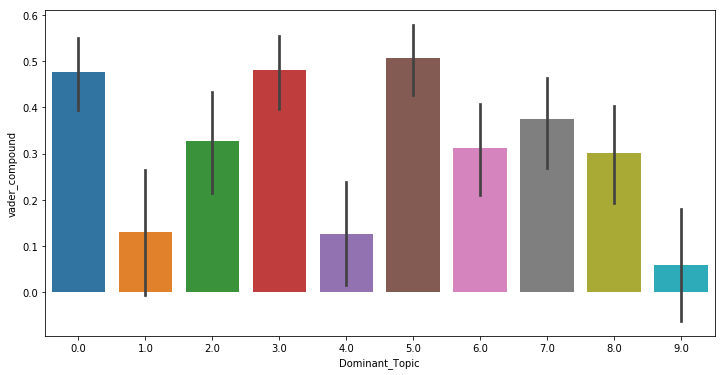

In [64]:
plt.rcParams["figure.figsize"] = (12,6)
sns.barplot(x='Dominant_Topic', y='vader_compound',data=combined)

In [50]:
topics = combined[['Dominant_Topic', 'Topic_Keywords']].drop_duplicates().sort_values('Dominant_Topic')

In [53]:
pd.set_option('display.max_colwidth', -1)
topics.style.hide_index()

Dominant_Topic,Topic_Keywords
0,"game, level, great, play, life, get, time, booster, like, thank"
1,"level, game, play, candy, time, playing, love, update, crush, app"
2,"game, candy, crush, level, love, booster, good, make, play, please"
3,"game, fun, get, win, candy, move, play, level, time, love"
4,"playing, gold, game, really, level, like, buy, bar, one, life"
5,"game, candy, level, way, awesome, crush, get, time, fun, addicting"
6,"game, level, playing, make, play, get, time, fun, booster, thing"
7,"game, love, addictive, life, level, back, candy, fun, also, know"
8,"game, level, get, app, one, like, life, every, gold, back"
9,"game, app, please, get, play, start, time, booster, level, hate"
